<a href="https://colab.research.google.com/github/hendrixtlan/tareaManipulacionDatos/blob/main/Actividad9RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

**Equipo 35**

A01683218 - José Israel Maldonado Jaramillo

A01795572 - Al Rashid Martínez Arriola

A01795592 - Fernando Reyes Veloz

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9"
os.chdir(DIR)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_df = pd.read_csv('data.csv')
data_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [7]:
# Leer el archivo CSV y establecer 'id' como el índice
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

# Exploración inicial de los datos
print(data_df.head())  # Muestra las primeras filas del DataFrame
print(data_df.info())   # Proporciona información sobre el DataFrame
print(data_df.describe())  # Muestra estadísticas descriptivas para columnas numéricas
print(data_df.isnull().sum())  # Muestra la cantidad de valores nulos en cada columna

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [8]:
# Estadísticas descriptivas para todas las variables del dataframe
print(data_df.describe(include='all'))

       diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000   

1b) Valores únicos por variable para identificar posibles variables categóricas.

In [9]:
# Obtener valores únicos por variable para identificar posibles variables categóricas
for column in data_df.columns:
    unique_values = data_df[column].unique()
    print(f"Valores únicos para la variable '{column}': {unique_values}")

Valores únicos para la variable 'diagnosis': ['M' 'B']
Valores únicos para la variable 'radius_mean': [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77 

1c) Búsqueda de valores faltantes.

In [10]:
# Búsqueda de valores faltantes
missing_values = data_df.isnull().sum()

# Mostrar los valores faltantes por columna
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

<ipython-input-11-18a7755c6a83>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data_df, palette='husl')


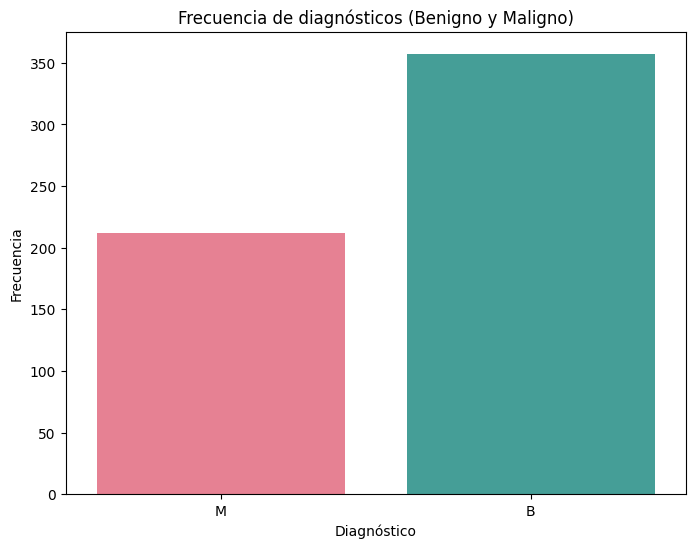

In [11]:
# Contar la frecuencia de diagnósticos
diagnosis_frequency = data_df['diagnosis'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data_df, palette='husl')

# Añadir etiquetas y título
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de diagnósticos (Benigno y Maligno)')

# Mostrar el diagrama de barras
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

<ipython-input-12-43cc23d7719f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


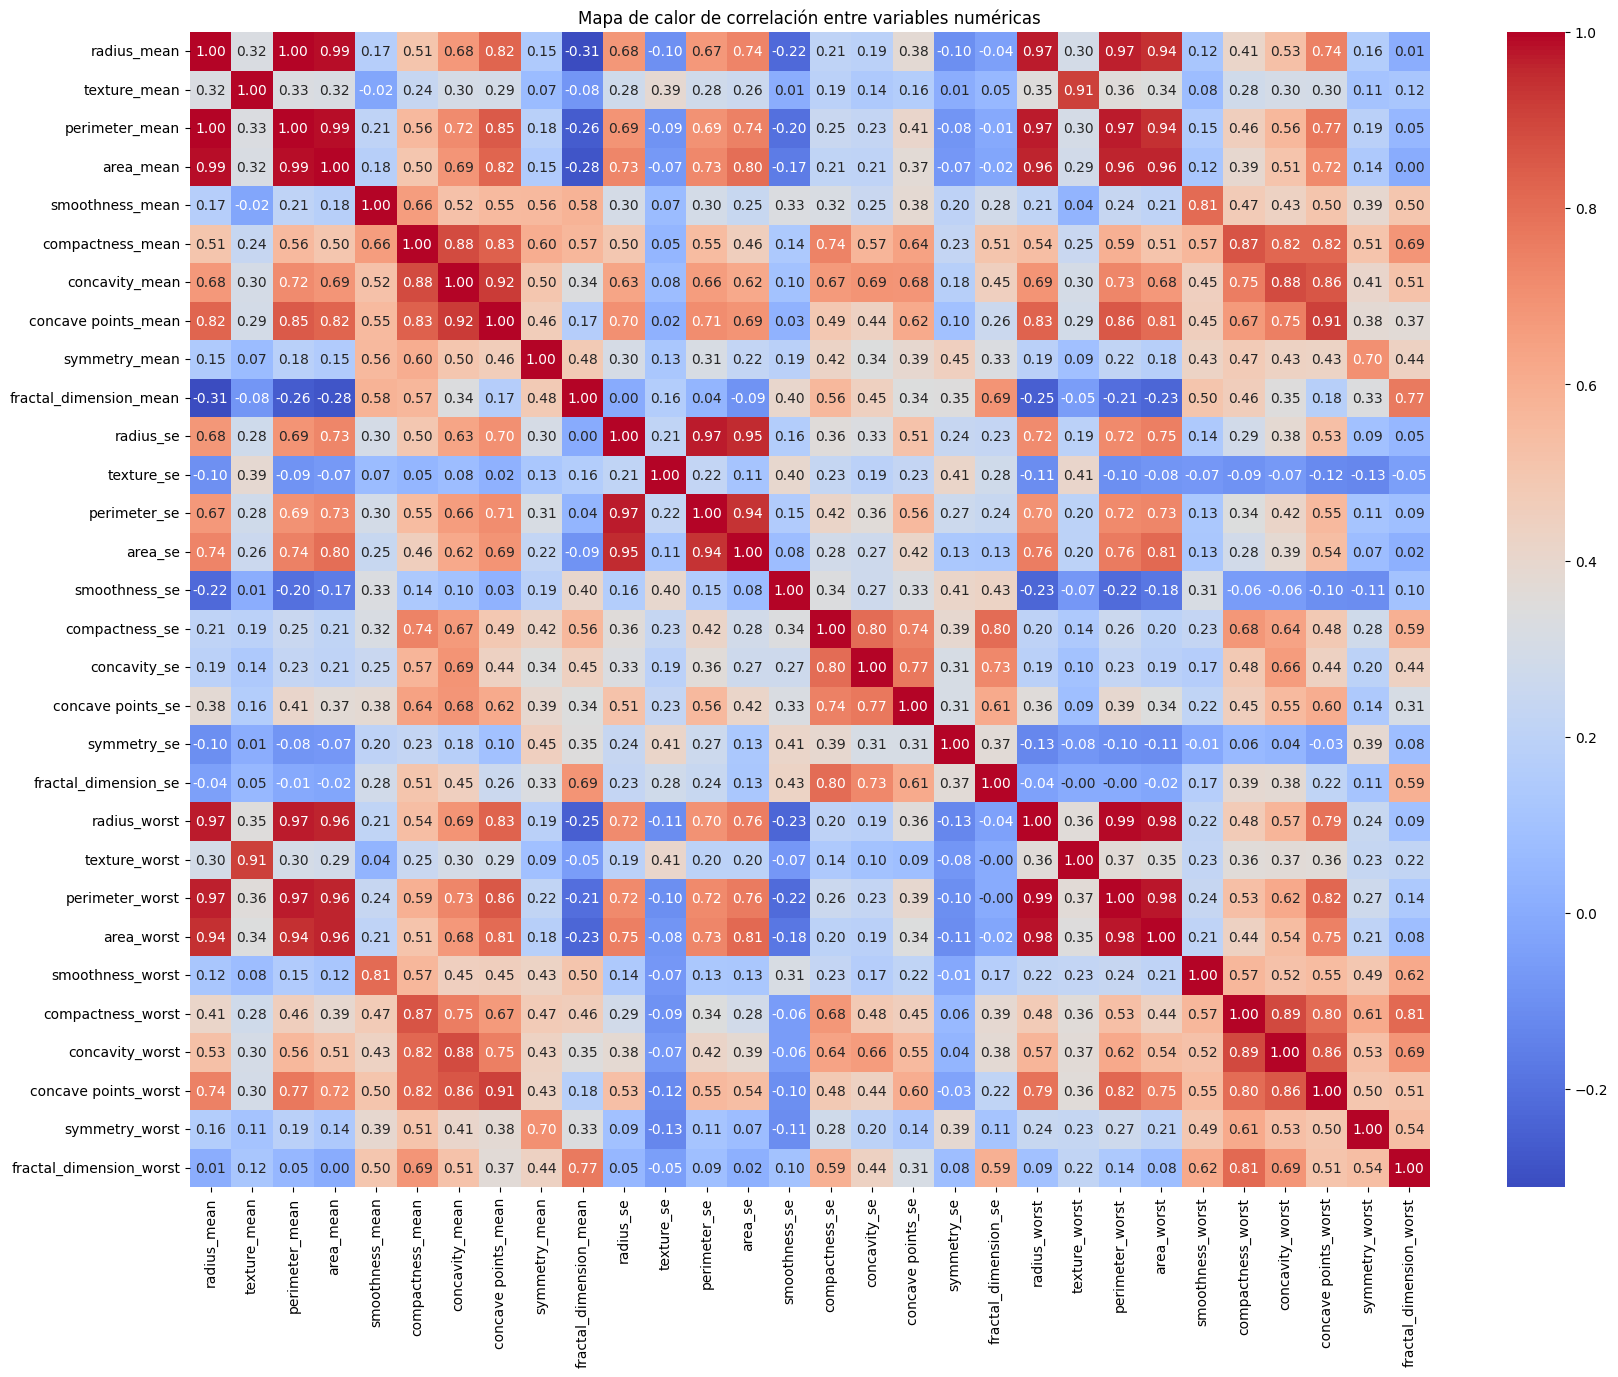

In [12]:
# Calcular la matriz de correlación
correlation_matrix = data_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

[texto del vínculo](https://)Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

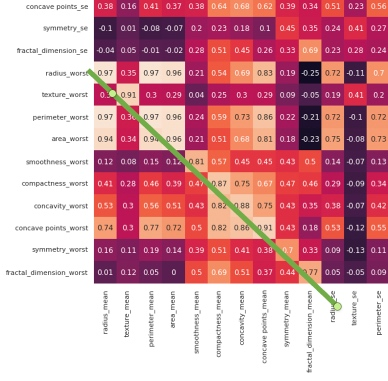

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [13]:
columns_to_drop = [col for col in data_df.columns if col.endswith('_worst')]
df_reduced = data_df.drop(columns=columns_to_drop)

df_reduced.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_se  texture_se  \
id                                            ...                          
842302                0.14710         0.2419  ...     1.0950      0.9053   
842517                0.07017         0.1812  ...     0.5435      0.7339   
84300903              0.12790         0.2069  ...     0.7456      0.7869   
84348301              0.10520         0.2597  ...     0.4956      1.1560   
84358402              0.10430         0.1809  ...     0.7572      0.7813   

          perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
id                                                                             
842302           8.589   153.40       0.006399         0.04904       0.05373   
842517           3.398    74.08       0.005225         0.01308       0.01860   
84300903         4.585    94.03       0.006150         0.04006       0.03832   
84348301         3.445    27.23       0.009110         0.07458       0.05661   
84358402         5.438    94.44       0.011490         0.02461       0.05688   

          concave points_se  symmetry_se  fractal_dimension_se  
id                                                              
842302              0.01587      0.03003              0.006193  
842517              0.01340      0.01389              0.003532  
84300903            0.02058      0.02250              0.004571  
84348301            0.01867      0.05963              0.009208  
84358402            0.01885      0.01756              0.005115  

[5 rows x 21 columns]

*3b*. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




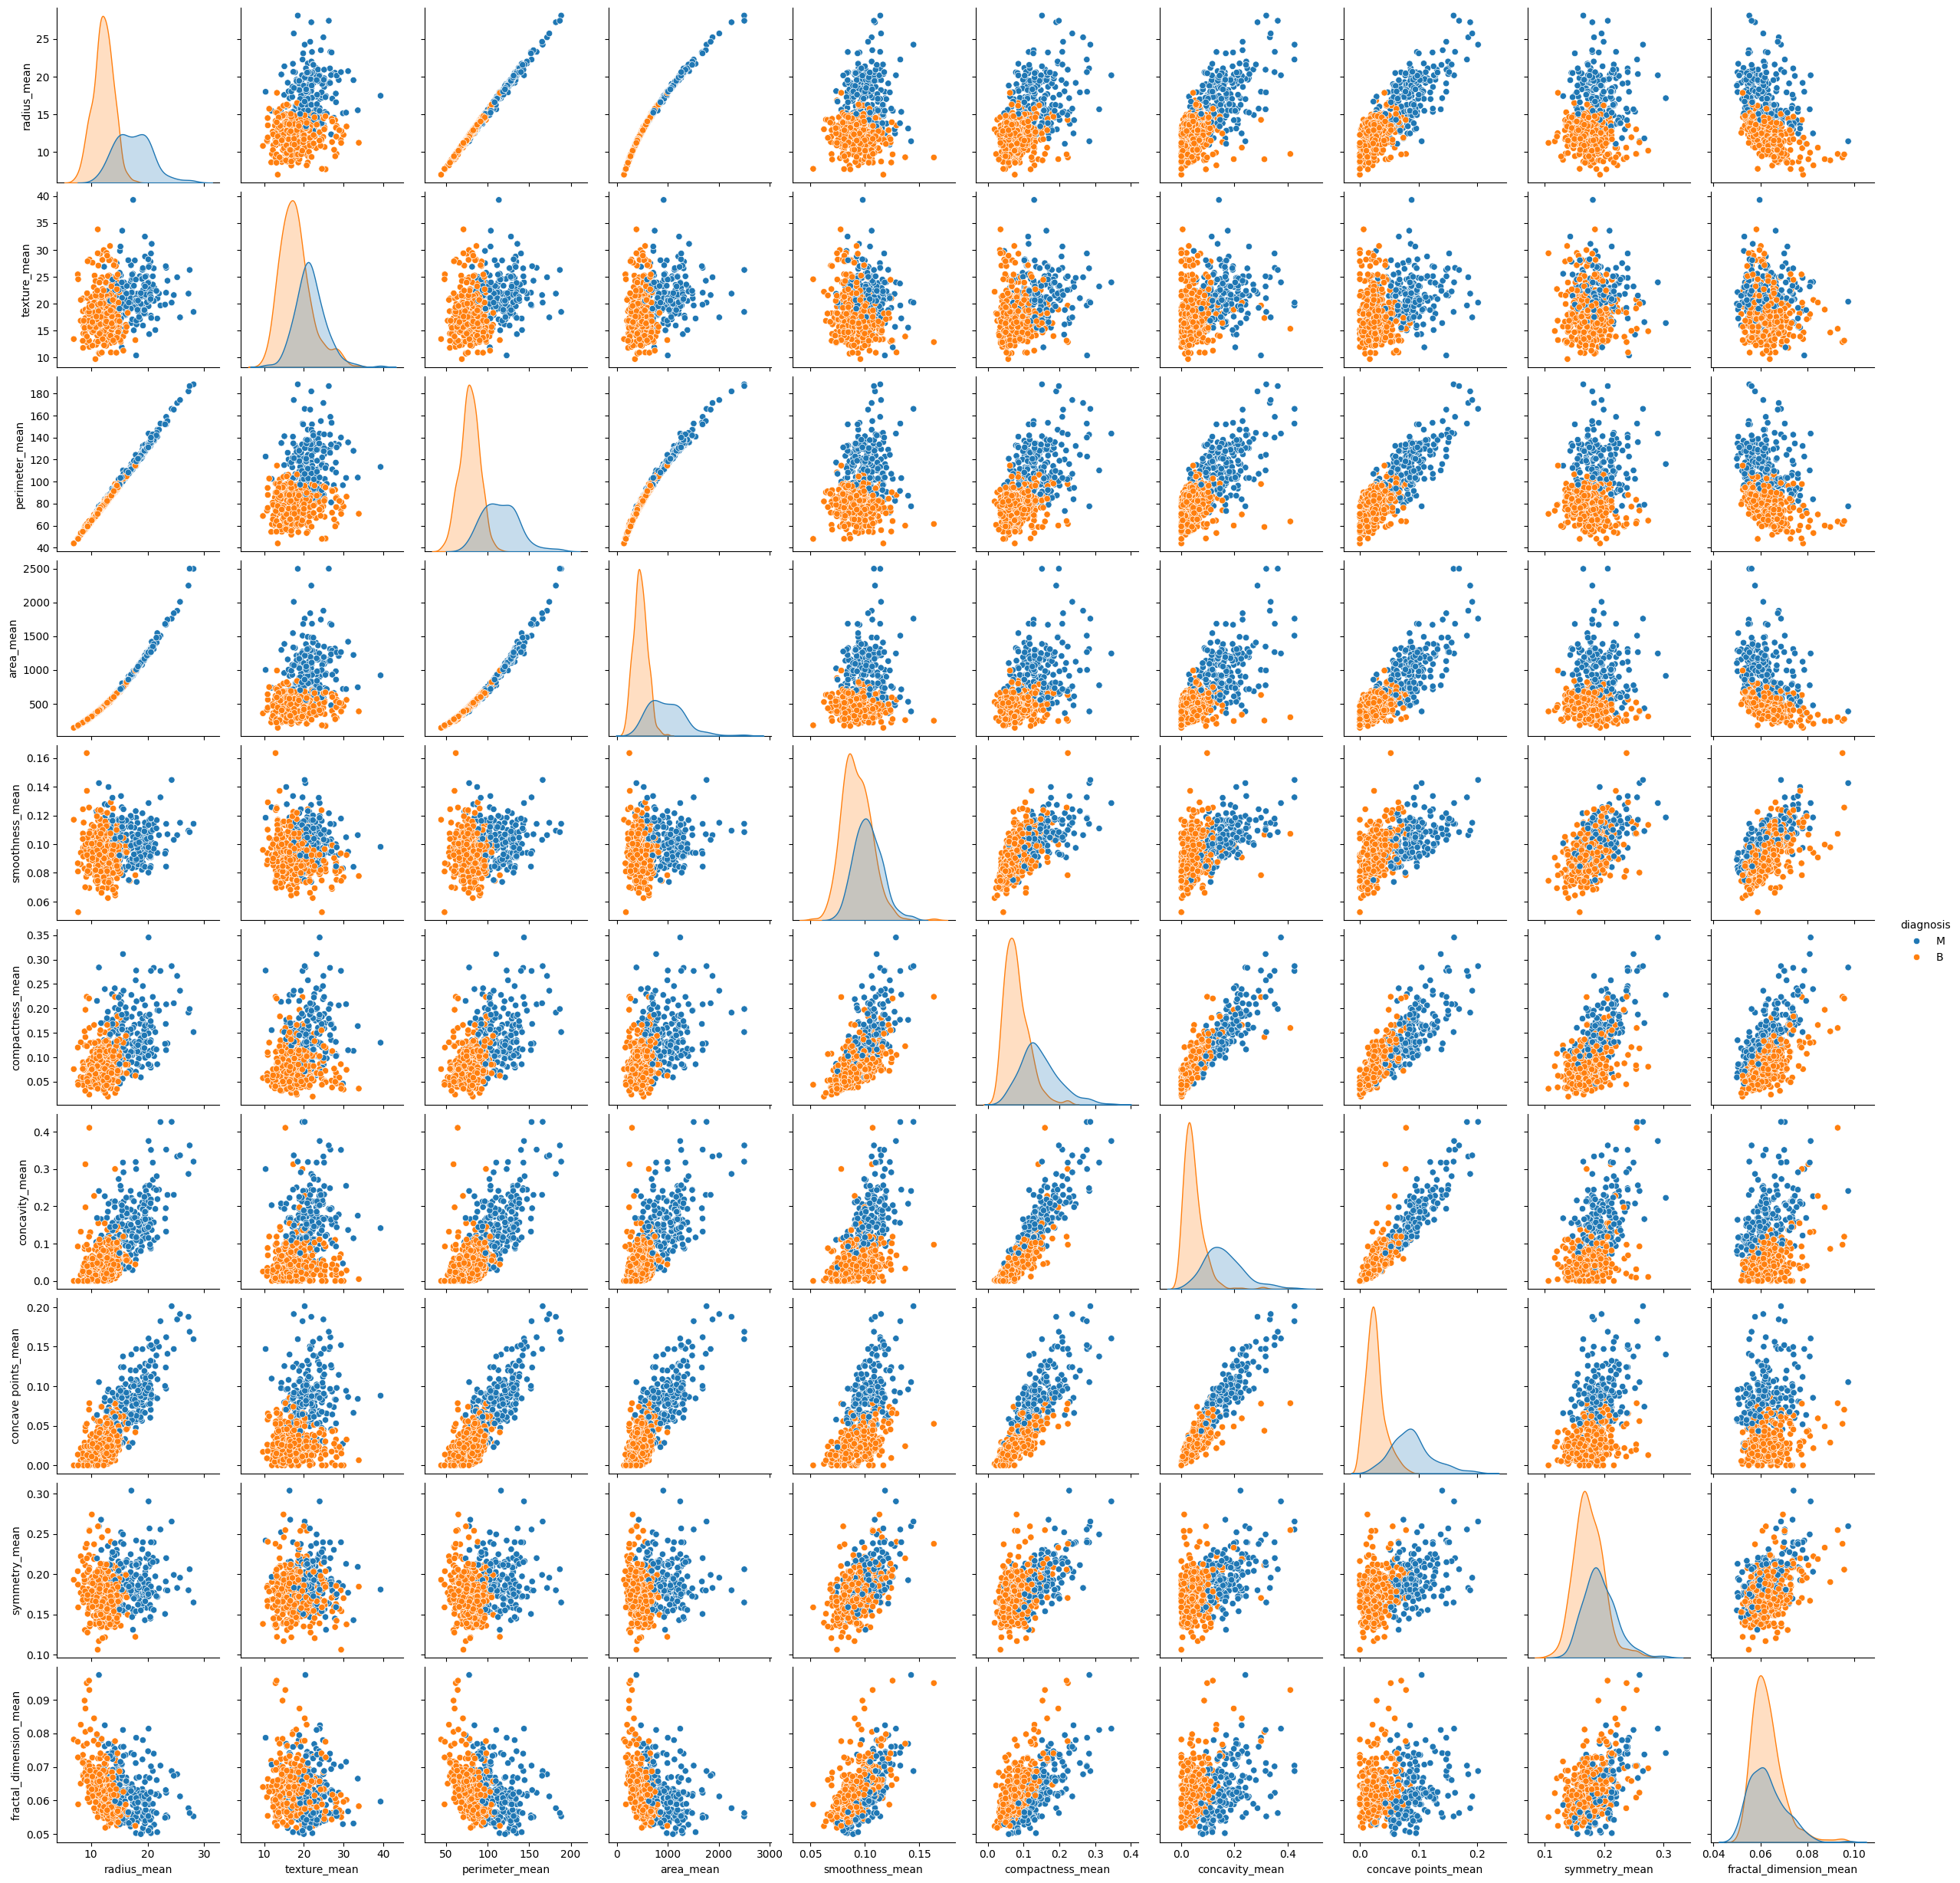

In [14]:
sns.pairplot(data=df_reduced[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                       'symmetry_mean', 'fractal_dimension_mean']], hue='diagnosis')

plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


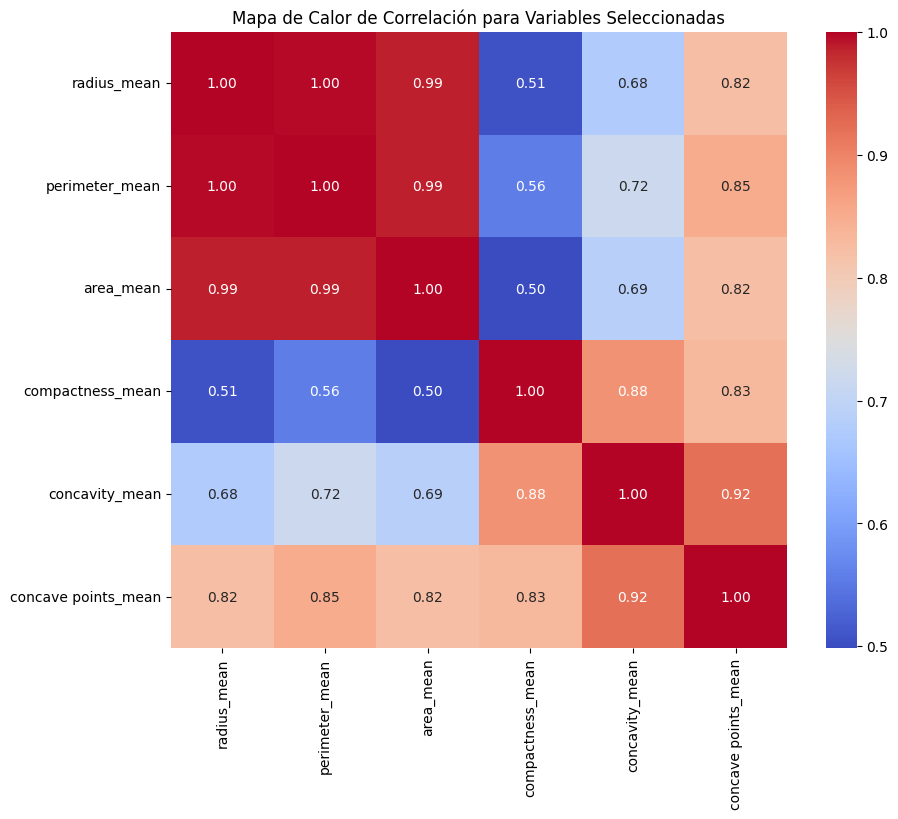

In [15]:
variables = ['radius_mean', 'perimeter_mean', 'area_mean',
                         'compactness_mean', 'concavity_mean', 'concave points_mean']

corr_matrix_selected = df_reduced[variables].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Mapa de Calor de Correlación para Variables Seleccionadas')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [16]:
variables_to_keep = ['radius_mean', 'compactness_mean', 'radius_se', 'compactness_se']
variables_to_drop = [col for col in df_reduced.columns if (col.endswith('_mean') or col.endswith('_se')) and col not in variables_to_keep]

df_final = df_reduced.drop(columns=variables_to_drop)

df_final.head()

diagnosis  radius_mean  compactness_mean  radius_se  compactness_se
id                                                                          
842302           M        17.99           0.27760     1.0950         0.04904
842517           M        20.57           0.07864     0.5435         0.01308
84300903         M        19.69           0.15990     0.7456         0.04006
84348301         M        11.42           0.28390     0.4956         0.07458
84358402         M        20.29           0.13280     0.7572         0.02461

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

<ipython-input-17-4340e95ff1b8>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df_final.skew()


['compactness_mean', 'radius_se', 'compactness_se']

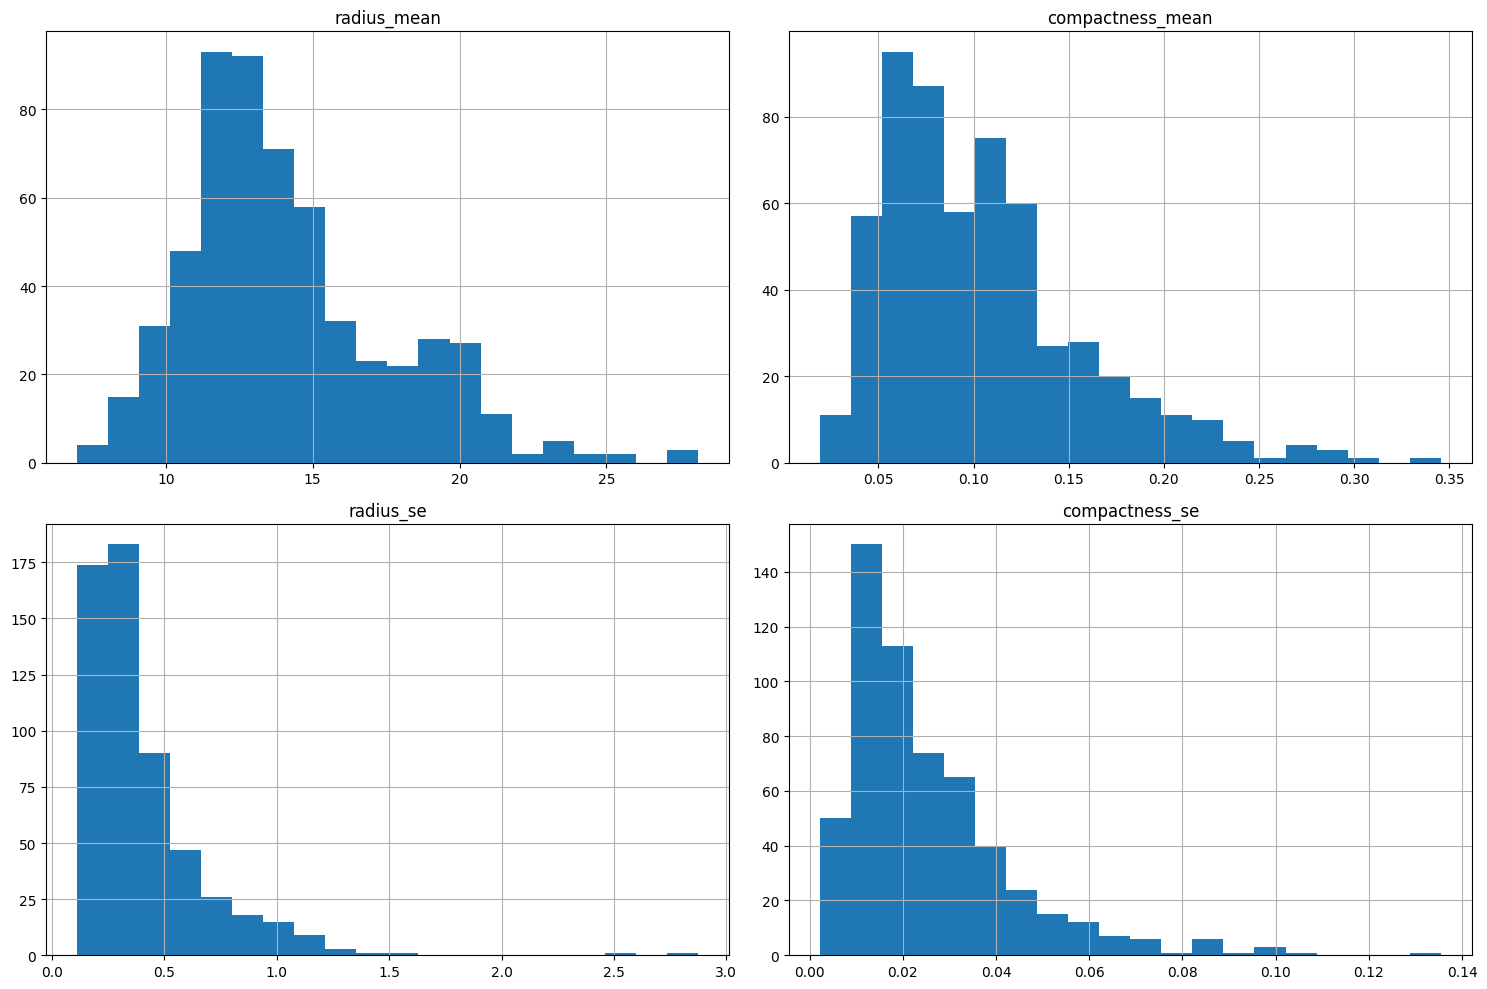

In [17]:
skewness = df_final.skew()

skew_cols = skewness[skewness > 1].index.tolist()

df_final.hist(figsize=(15, 10), bins=20)
plt.tight_layout()

skew_cols

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst']

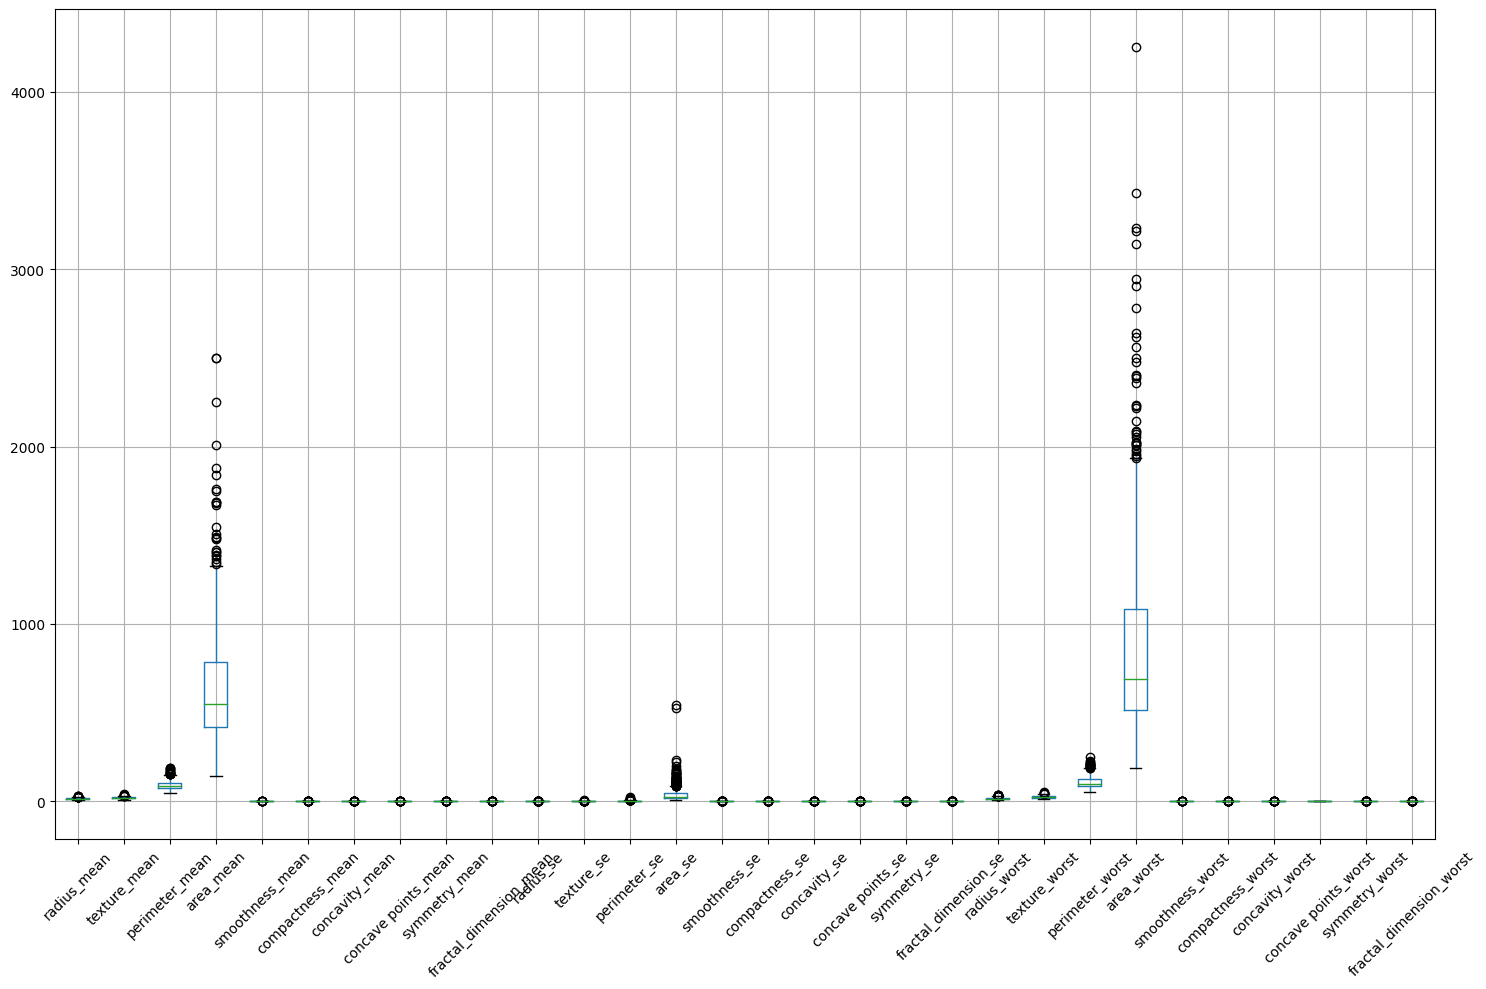

In [18]:
plt.figure(figsize=(15, 10))
data_df.boxplot(rot=45)
plt.tight_layout()

numeric_cols_new = data_df.select_dtypes(include=['float64', 'int64'])
scale_cols = [col for col in numeric_cols_new if data_df[col].min() < 0 or data_df[col].max() > 1 and col not in ['id', 'diagnosis']]

scale_cols


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [19]:
from sklearn.model_selection import train_test_split

df_model = pd.read_csv('data.csv', index_col='id')

X = df_model.drop('diagnosis', axis=1)
y = df_model['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [20]:
from sklearn.compose import ColumnTransformer

columns_to_drop = ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'texture_mean',
                   'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                   'fractal_dimension_mean', 'texture_se', 'compactness_se', 'concavity_se',
                   'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_mean',
                   'smoothness_se']

preprocessing = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

logr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(max_iter=10000))
])

logr_model.fit(X_train, y_train)

y_pred = logr_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='M')
precision = precision_score(y_test, y_pred, pos_label='M')

conf_matrix, accuracy, recall, precision


(array([[72,  0],
        [ 4, 38]]),
 0.9649122807017544,
 0.9047619047619048,
 1.0)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

skew_cols_updated = [col for col in skew_cols if col != 'id']

sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)
minmax_scaler = MinMaxScaler()

preprocessing_updated = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop),
        ('sqrt', sqrt_transformer, skew_cols_updated),
        ('minmax', minmax_scaler, scale_cols)
    ],
    remainder='passthrough'
)

preprocessing_updated

logr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing_updated),
    ('classifier', LogisticRegression(max_iter=10000))
])




6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [23]:
logr_model2.fit(X_train, y_train)

y_pred2 = logr_model2.predict(X_test)

conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])
accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2, pos_label='M')
precision2 = precision_score(y_test, y_pred2, pos_label='M')

conf_matrix2, accuracy2, recall2, precision2

(array([[72,  0],
        [ 6, 36]]),
 0.9473684210526315,
 0.8571428571428571,
 1.0)

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [40]:
from sklearn.preprocessing import StandardScaler

features = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'area_se', 'concavity_se', 'fractal_dimension_se', 'concavity_worst','symmetry_worst','fractal_dimension_worst']
X = data_df.loc[:, features].values
y = data_df['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape








(455, 10)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [39]:
from sklearn.decomposition import PCA
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_breast = pd.DataFrame(X_train_scaled,columns=feat_cols)
normalised_breast.tail()
pca_breast = PCA(n_components=6)
principalComponents_breast = pca_breast.fit_transform(X_train_scaled)
principalComponents_breast.shape
pca_breast.explained_variance_ratio_

#Al hacer varias pruebas, se determina que el número de componentes son 3
#con dos componentes array([0.44755027, 0.1876713 ])
#con cuatro componentes array([0.44755027, 0.1876713 , 0.11681982, 0.09326812])



array([0.44168657, 0.19060788, 0.12045262, 0.09307828, 0.06023231,
       0.03741236])

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

accuracy score: 0.9736842105263158
classifcation report : 
                precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



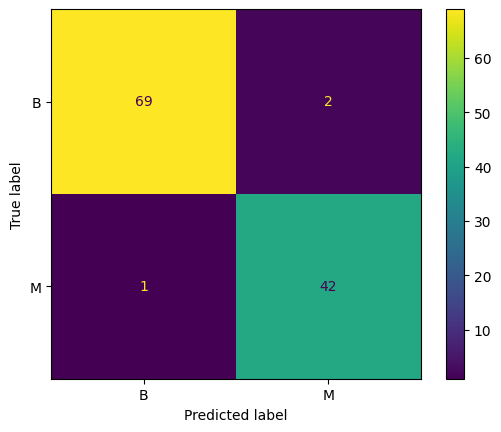

     pred_neg  pred_pos
neg         0        71
pos         0        43


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
logr_model3 = LogisticRegression()
logr_model3.fit(X_train_scaled, y_train)
y_pred = logr_model3.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test,y_pred)
print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')
cm  = confusion_matrix(y_test,y_pred)
cm
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=logr_model3.classes_)
disp.plot()
plt.show()

y_scores = logr_model3.predict_proba(X_test)[:, 1]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
p, r, thresholds = precision_recall_curve(y_test_encoded, y_scores)
#p, r, thresholds = precision_recall_curve(y_test, y_scores)

def adjusted_classes(y_scores, t):
#This function adjusts class predictions based on the prediction threshold (t).Works only for binary classification problems.
    return [1 if y >= t else 0 for y in y_scores]
def precision_recall_threshold(p, r, thresholds, t=0.5):
    #plots the precision recall curve and shows the current value  for each by identifying the classifier's threshold (t).
    # generate new class predictions based on the adjusted classes
    #function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test_encoded, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'],
                       index=['neg', 'pos']))
    #print(classification_report(y_test, y_pred_adj))

precision_recall_threshold(p, r, thresholds, 0.44)

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

Al modificar los thresholds podríamos mejorar la precisión del diagnóstico médico, la probaría para mejorar los valores de la precisión y la veracidad.